In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bluebook-for-bulldozers/Valid.7z
/kaggle/input/bluebook-for-bulldozers/Valid.zip
/kaggle/input/bluebook-for-bulldozers/Train.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv
/kaggle/input/bluebook-for-bulldozers/median_benchmark.csv
/kaggle/input/bluebook-for-bulldozers/Valid.csv
/kaggle/input/bluebook-for-bulldozers/Machine_Appendix.csv
/kaggle/input/bluebook-for-bulldozers/random_forest_benchmark_test.csv
/kaggle/input/bluebook-for-bulldozers/Data Dictionary.xlsx
/kaggle/input/bluebook-for-bulldozers/ValidSolution.csv
/kaggle/input/bluebook-for-bulldozers/Test.csv
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.zip
/kaggle/input/bluebook-for-bulldozers/TrainAndValid.7z
/kaggle/input/bluebook-for-bulldozers/Train.7z


In [2]:
import matplotlib.pyplot as plt
import sklearn

In [115]:
# import training and validation data
df = pd.read_csv("/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

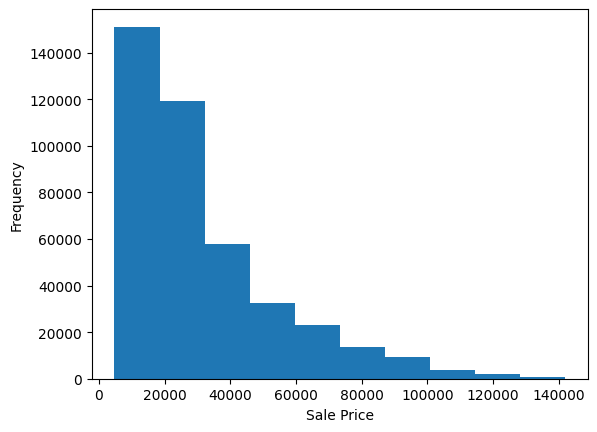

In [6]:
df.SalePrice.plot.hist(xlabel="Sale Price");

In [7]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

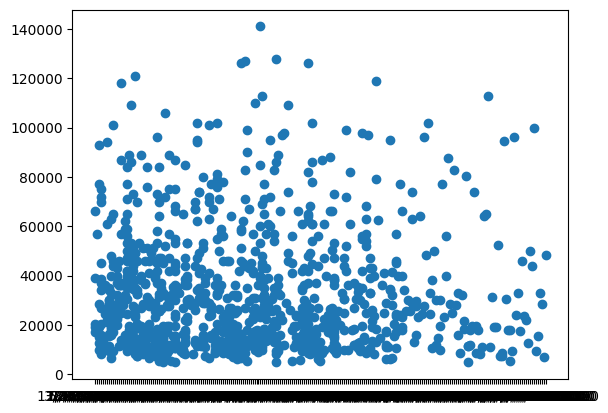

In [8]:
# visualize the first 1000 data
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [9]:
df["saledate"].dtype

dtype('O')

In [10]:
df["saledate"][:5]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
Name: saledate, dtype: object

In [116]:
# Clearly the dates column are object type and hence we have to parse them
df = pd.read_csv("/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv", 
                low_memory=False, 
                parse_dates=["saledate"])
df["saledate"].head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

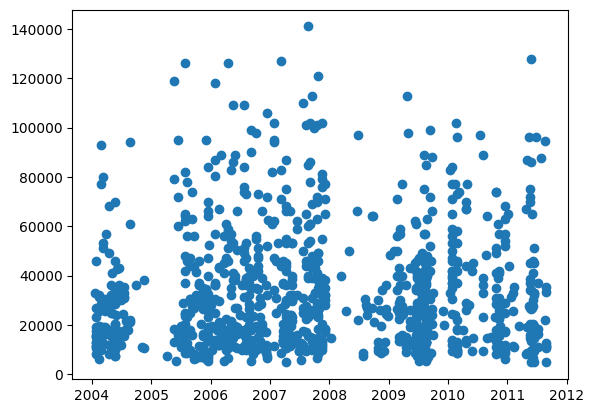

In [13]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [125]:
# make a copy of df to make changes
df_tmp = df.copy()

In [126]:
# Add date time parameter for "saledate" column
df_tmp[:1].saledate

0   2006-11-16
Name: saledate, dtype: datetime64[ns]

In [119]:
print(df_tmp[:1].saledate.dt.year)
print(df_tmp[:1].saledate.dt.day)

0    2006
Name: saledate, dtype: int32
0    16
Name: saledate, dtype: int32


In [127]:
# create new cols
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear
df_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'saleYear',
       'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],

In [128]:
# now we've enriched features we can drop the saledate col
df_tmp.drop('saledate', axis=1, inplace=True)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,521D,...,NaN,NaN,NaN,Standard,Conventional,2006,11,16,3,320
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,950FII,...,NaN,NaN,NaN,Standard,Conventional,2004,3,26,4,86
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,226,...,NaN,NaN,NaN,NaN,NaN,2004,2,26,3,57
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,NaN,NaN,NaN,NaN,NaN,2011,5,19,3,139
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,NaN,NaN,NaN,NaN,NaN,2009,7,23,3,204


In [129]:
# let's see sales with cities
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

### Modelling

In [81]:
# lets see model driven EDA
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [ ]:
df_tmp.info()

### So we must clean data especially null values and dtypes before passing into the model

In [ ]:
df.info()

In [130]:
# select columns that contain string (object) values
string_cols = df_tmp.select_dtypes('object').columns.to_list()
string_cols

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [131]:
# convert the cols wth string dtype to categories and ordered them -> A, B, C..
for col in string_cols:
    df_tmp[col] = df_tmp[col].astype("category").cat.as_ordered()

In [132]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [133]:
# visualzation of ordered
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [134]:
df_tmp.state.value_counts().head()

state
Florida       67320
Texas         53110
California    29761
Washington    16222
Georgia       14633
Name: count, dtype: int64

In [135]:
# let's address missing data now
df_tmp.isnull().sum() / len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Fill missing numerical cols

In [136]:
# check for numerical value cols
num_cols = df_tmp.select_dtypes(include='number').columns.to_list()
num_cols

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear']

In [137]:
m_cols = []
for col in num_cols:
    if df_tmp[col].isna().any():
        m_cols.append(col)
m_cols

['auctioneerID', 'MachineHoursCurrentMeter']

In [138]:
for col in m_cols:
    df_tmp[col + '_was_missing'] = df_tmp[col].isna()        # mark missing
    df_tmp[col] = df_tmp[col].fillna(df_tmp[col].median())       # assign filled values back

df_tmp.isna().sum()

SalesID                                      0
SalePrice                                    0
MachineID                                    0
ModelID                                      0
datasource                                   0
auctioneerID                                 0
YearMade                                     0
MachineHoursCurrentMeter                     0
UsageBand                               339028
fiModelDesc                                  0
fiBaseModel                                  0
fiSecondaryDesc                         140727
fiModelSeries                           354031
fiModelDescriptor                       337882
ProductSize                             216605
fiProductClassDesc                           0
state                                        0
ProductGroup                                 0
ProductGroupDesc                             0
Drive_System                            305611
Enclosure                                  334
Forks        

### Fill missing categorical data

In [139]:
cat_cols = df_tmp.select_dtypes('category').columns.to_list()
cat_cols

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [140]:
for col in cat_cols:
    # Mark missing values
    df_tmp[col + "_is_missing"] = df_tmp[col].isna()
    
    # Convert categories to numeric codes (+1 so missing becomes 0 instead of -1)
    df_tmp[col] = pd.Categorical(df_tmp[col]).codes + 1

In [141]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [142]:
# Let's fit the model now

In [143]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: user 19min 58s, sys: 5.11 s, total: 20min 4s
Wall time: 5min 5s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [144]:
# scoring on the data it was trained on, closer to 1 the better 
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875471593700775

### Splitting data into training and validation sets

In [147]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [149]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_val, y_val = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((401125, 102), (11573, 102), (401125,), (11573,))

### Building the RMSLE error as required in the competition

In [156]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates the root mean squared log error
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_val, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Valid MAE": rmsle(y_val, val_preds),
        "Training R2": r2_score(y_train, train_preds),
        "Valid R2": r2_score(y_val, val_preds)
    }
    return scores

### Testing with a different hyperparameter

In [159]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10_000)
model.fit(X_train, y_train)

CPU times: user 42.7 s, sys: 245 ms, total: 43 s
Wall time: 11 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [160]:
show_scores(model)

{'Training MAE': 5554.061618822064,
 'Valid MAE': 0.2924838018762678,
 'Training RMSLE': 0.25758465681614984,
 'Training R2': 0.8608402371243158,
 'Valid R2': 0.83308596217853}

### We'll find the best parameters possible using Randomized Search CV

In [170]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Different hyperparameters to explore
rf_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt"],
    "max_samples": [10_000]
}

# Instantiate RandomizedSearchCV with the model
rs = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=rf_grid,
    n_iter=2,
    cv=5,
    verbose=True
)

# Fit the model
rs.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 13.7 s, sys: 686 ms, total: 14.4 s
Wall time: 7.88 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [171]:
# Parameters we got
rs.best_params_

{'n_estimators': 90,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': 5}

In [172]:
# Evaluate the model
show_scores(rs)

{'Training MAE': 14198.212319692384,
 'Valid MAE': 0.6205306981822035,
 'Training RMSLE': 0.6049093460034936,
 'Training R2': 0.2954844663467132,
 'Valid R2': 0.275924290496411}

## Clearly the model is worse, we'll use the best parameters for 
> n_iter = 100

In [173]:
%%time

# most ideal hyperparams
ideal_model = RandomForestRegressor(n_jobs=-1,
                                    n_estimators=40,
                                    min_samples_split=14,
                                    min_samples_leaf=1,
                                    max_features=0.5,
                                    max_samples=None,
                                    random_state=42)

ideal_model.fit(X_train, y_train)
show_scores(ideal_model)

CPU times: user 3min 33s, sys: 607 ms, total: 3min 34s
Wall time: 54.9 s


{'Training MAE': 2951.123355082265,
 'Valid MAE': 0.246251621813037,
 'Training RMSLE': 0.14442743143522901,
 'Training R2': 0.9589090179371786,
 'Valid R2': 0.8819835895768973}

## Make predictions on test data

In [192]:
# import the test data
df_test = pd.read_csv("/kaggle/input/bluebook-for-bulldozers/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## Preprocess the test data to match train data format

In [193]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [194]:
def preprocess(df):
    """
    Preprocesses input DataFrame into the format used for training.

    Steps:
    1. Extracts date parts from `saledate`.
    2. Converts string (object) columns to ordered categorical.
    3. Fills missing numeric values with median and marks them.
    4. Encodes categorical variables into numeric codes (+1 so NaN → 0).
    5. Returns the cleaned DataFrame.
    """

    # --- 1. Extract date features ---
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)

    # --- 2. Handle string columns ---
    string_cols = df.select_dtypes('object').columns
    for col in string_cols:
        df[col] = df[col].astype("category").cat.as_ordered()

    # --- 3. Handle numeric columns (fill missing with median) ---
    num_cols = df.select_dtypes(include='number').columns
    for col in num_cols:
        if df[col].isna().any():
            df[col + "_was_missing"] = df[col].isna()   # mark missing
            df[col] = df[col].fillna(df[col].median())  # fill with median

    # --- 4. Handle categorical columns (encode to codes) ---
    cat_cols = df.select_dtypes('category').columns
    for col in cat_cols:
        df[col + "_is_missing"] = df[col].isna()                    # mark missing
        df[col] = pd.Categorical(df[col]).codes + 1  # NaN → 0, cats start at 1

    return df


In [195]:
df_test = preprocess(df_test)
df_test.shape, X_train.shape

((12457, 101), (401125, 102))

In [196]:
# the shapes are not matching, 1 feature is mising in df_test
set(X_train) - set(df_test)

{'auctioneerID_was_missing'}

In [199]:
# fix the missing column, no AID since no sales yet
df_test["auctioneerID_was_missing"] = False
df_test.shape

(12457, 102)

## Make predctions in the format Kaggle wants [SalesID, Price]

In [202]:
# Align test set with training features
df_test_aligned = df_test[X_train.columns]

# Now predict
test_preds = ideal_model.predict(df_test_aligned)

# Build submission
df_preds = pd.DataFrame({
    "SalesID": df_test["SalesID"],   # original ID column
    "SalesPrice": test_preds
})
df_preds.head()

,SalesID,SalesPrice
0,1227829,17323.790690
1,1227844,17166.797984
2,1227847,51431.264914
3,1227848,70764.995455
4,1227863,57971.058208


In [206]:
# Save predictions in the working directory
df_preds.to_csv("/kaggle/working/test_predictions.csv", index=False)

## Feature importance

In [204]:
len(ideal_model.feature_importances_)

102

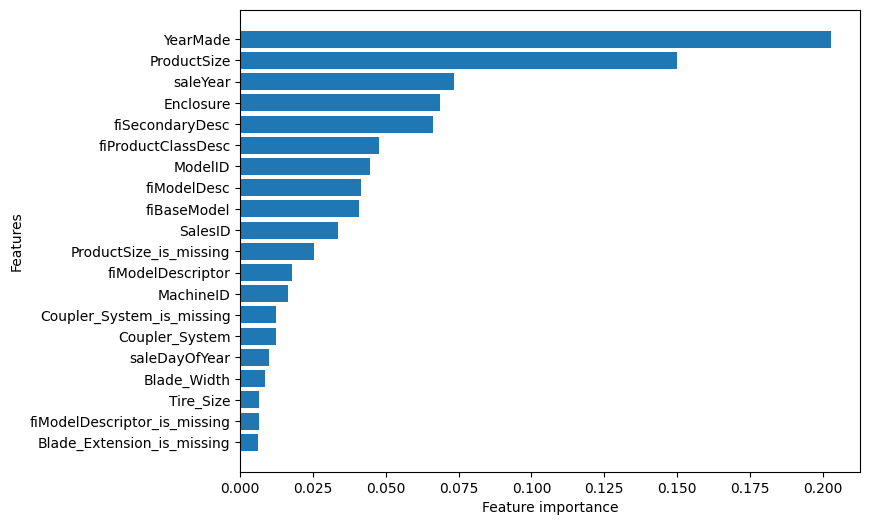

In [205]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    # Create a dataframe of features and their importances
    df = (
        pd.DataFrame({"features": columns, "feature_importances": importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True)
    )
    
    # Plot the top n features
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()  # Most important at top
    plt.show()

plot_features(X_train.columns, ideal_model.feature_importances_, n=20)